# 230829_ 화요일 자습내용

## 오늘 한 것

0. [Error 01 : 문자열 에러(django-environ 충돌)](#0-error-01--문자열-에러django-environ-충돌)

1. [HTML 파일 수정과 BootStrap 연결](#1-html-파일-수정과-bootstrap-연결)

2. [Google Fonts 적용](#2-google-fonts-적용)

3. [HTML 파일을 CSS+HTML로 분리하기](#3html-파일을-csshtml로-분리하기)

4. [CSS 간단 핵심](#4-css-간단-핵심)

5. [Django Model : DB]()



## 0. Error 01 : 문자열 에러(django-environ 충돌)

어제 [Django-environ](https://django-environ.readthedocs.io/en/latest/quickstart.html) 을 설정했었다.

그로 인한 에러 발생

1. 멀쩡하던 문자열 인식 에러 발생

2. 인자 오류

로, 원래 멀쩡했던 DB 관련 코드

In [ ]:
DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': BASE_DIR / 'db.sqlite3',
    }
}

` 'NAME': BASE_DIR / 'db.sqlite3', TypeError: unsupported operand type(s) for /: 'str' and 'str'`

오류가 나온다.

아마 Django-environ 에서 `BASE_DIR` 를 새로 설정해서 그런듯

패스문제?

아니면 변수가 겹치나?

아니면 타입 선언을 새로해야하나?

좀 더 파악해보자

### 원인

- 패스문제는 반쯤 문제였다.

- 변수 겹침은 없었다.

- 타입 선언 문제 <---------------- 이거

23년 08월 29일 현재, [Django-environ](https://django-environ.readthedocs.io/en/latest/quickstart.html) 에서 Quick Start 를 시작하면 기본으로 제공하는 패스가 있는데 출력 결과 `str` 타입이었다.

생각해보니 파이썬 패스 출력 결과는 `str` 으로 보이지만, 사실은 패스를 선언하는 특별한 경로객체이다.

당연히 타입 에러가 날 수밖에.

### 해결

방법은 두 가지

In [ ]:
# 1번 / str로 경로를 받는 경우
# settings.py

# str 경로
BASE_DIR = os.path.dirname(os.path.dirname(os.path.abspath(__file__)))

# `/`에서 str 연결 변경 => `/` > `,`
DATABASES = {
    'default': {
        'ENGINE': 'django.db.backends.sqlite3',
        'NAME': BASE_DIR, 'db.sqlite3',
    }
}

In [ ]:
# 2번 / 경로 객체로 경로를 받는 경우
# settings.py

# str 경로
BASE_DIR = Path(__file__).resolve().parent.parent

# SECRET_KEY 타입 변경
SECRET_KEY = env.str('SECRET_KEY')

개인적으론 2번 방법이 마음에 든다.

경로 객체를 사용하는 경우가 많을까, 아니면 `str` 객체를 쓰는 경우가 많을까 생각하면 전자일거라는 판단.

필요한 경우에만 바꿔주자.

## 1. HTML 파일 수정과 BootStrap 연결

[BootStrap-QuickStart-링크](https://getbootstrap.com/docs/4.3/getting-started/introduction/)

>모든 HTML을 각 개발자가 하나부터 열까지 전부 다 만든다..?\
>개발자 죽는다.그래서 트위터에서 만든 에셋을 링크로 활용해 개발자들을 살리자!

**사용(QuickStart- 기본)**

1. CSS Link를 `head.html` 에 적용시킴

In [ ]:
<!-- head.html -->
<head>
    <meta charset="UTF-8">
    <title>Pragmatic</title>

    <!-- BootStrap Link -->
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.3.1/dist/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">

</head>

## 2. Google Fonts 적용

[Google Fonts-링크](https://fonts.google.com/)

웹 페이지 폰트 적용을 위해 사용. Title, Footer 에 적용함

사용방법

1. 원하는 폰트 찾기

2. `Select Regular` 버튼 / 아니면 우측상단 4개 사각형

3. `head.html` 에 Link 적용

4. 원하는 CSS 위치에 `fontfamily: 'xxx','xxx'` 적용

In [ ]:
<!-- head.html -->
<head>
    <meta charset="UTF-8">
    <title>Pragmatic</title>

    <!-- BootStrap Link -->
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@4.3.1/dist/css/bootstrap.min.css" integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous">

    <!-- Google.Fonts-Lobster Link -->
    <link rel="preconnect" href="https://fonts.googleapis.com">
    <link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
    <link href="https://fonts.googleapis.com/css2?family=Lobster&display=swap" rel="stylesheet">

</head>

In [ ]:
<div class="Main_align">
    <div>
        <h1 style="font-family:'Lobster', cursive;">
            Pragmatic
        </h1>    
    </div>
</div>

## 3.HTML 파일을 CSS+HTML로 분리하기

스테틱 먼저 적용해야함\
자주 변경되지 않는 에셋, 파일을 통칭=스테틱

앱별로 따로 관리함

`settings.py` 안에

In [ ]:
#settings.py
STATIC_URL = 'static/'

STATIC_ROOT = os.path.join(BASE_DIR, 'staticfiles')

In [ ]:
# 이후 git bash에서

$ python manage.py collectstatic

#프로젝트 내부의 모든 static 파일을 한 곳으로 모아줌

[장고문서-링크](https://docs.djangoproject.com/en/4.2/howto/static-files/) 에 따르면 프로젝트와 별개로 관리할 수 있는 StaticFiles들을 관리할 수 있다고 함

In [ ]:
# settings.py

STATIC_URL = 'static/'

STATIC_ROOT = os.path.join(BASE_DIR, 'staticfiles')

STATICFILES_DIRS = [
    BASE_DIR / "static", 
]

이후

1. 프로젝트 폴더(앱아님) 내부에 `static` 폴더 생성, `base.css` 생성

2. `xxx.html` 내부의 `style` 복사, 삭제

3. `<h6 style='xxxx'>` 를 `<h6 class="">` 로 변경하기!! (클래스 적용)

4. `base.css` 로 이동 해당 클래스 설정

5. 단 클래스 선언은 `.` 으로 한다.

In [ ]:
<!-- base.css -->
.pragmatic_footer_logo{
    font-family: 'Lobster', cursive;
}

6. `base.css`를 해당 `.html` 내부에 선언
    1. 링크를 선언하는 `head.html` 최상단에
    2. {% load static(`.css` 파일 디렉토리명) %} 추가
    3. 하단에 아래와 같이 추가

In [ ]:
{% load static(`.css` 파일 디렉토리명) %}

<!-- Default css Link -->
<link rel="stylesheet" type="text/css" href="{% static 'base.css' %}"

이제 `.css` 파일 내부에 `style` 들을 집합시킬 수 있다.

### 전체 흐름을 정리하자면,

1. `settings.py` 에서 `static` 선언 -> 이로써 `.html`과 `.css` 를 연결시킬 수 있다.

2. `.html` 내부에서 `class` 를 선언 -> 내부의 `style` 들을 모두 `.css`에서 처리함

3. `head.html` 내부에서 해당 `.css`가 있는 `static` 호출

4. `head.html` 내부에서 해당 `.css` 호출 

5. 적용되는 `.class` 선언.

## 4. CSS 간단 핵심

**C**: ascading\
**S**: tyle\
**S**: heet\

HTML을 꾸미는 디자인 언어 묶음

### Display Attribute

디스플레이 속성들이 화면 구성을 정의함

- Block
- Inline
- Inline-Block
- None

### Visibility

- Hidden

### SIZE

- px
- em
- rem <------ 제일 많이 씀
- %

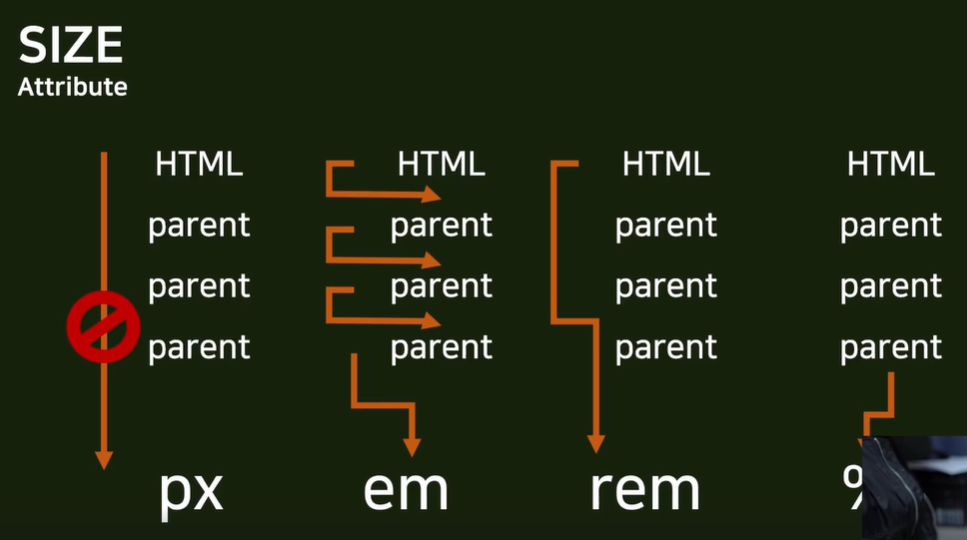

### 실습

`.html` 파일 내부에서 Class 선언도 가능함

In [ ]:
<style>
    .testing{
        background-color: white
    }
</style>

## 5. Django Model : DB